In [1]:
import pandas as pd

# Load training set
X_train = pd.read_csv("../data/processed/X_train.csv")
y_train = pd.read_csv("../data/processed/y_train.csv")

# Merge features with target
df_train = X_train.copy()
df_train["Disease"] = y_train

# Display first few rows
df_train.head()


,abdominal_pain,abnormal_menstruation,acidity,acute_liver_failure,altered_sensorium,anxiety,back_pain,belly_pain,blackheads,bladder_discomfort,...,watering_from_eyes,weakness_in_limbs,weakness_of_one_body_side,weight_gain,weight_loss,yellow_crust_ooze,yellow_urine,yellowing_of_eyes,yellowish_skin,Disease
0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,4.0,hepatitis A
1,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,Arthritis
2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,3.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Urinary tract infection
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Acne
4,3.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,Peptic ulcer diseae


## Check for Missing Values

In [2]:
# Check missing values
missing_values = df_train.isnull().sum().sum()
print(f"Total missing values: {missing_values}")


Total missing values: 0


In [8]:
pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


## Visualize Disease Distribution

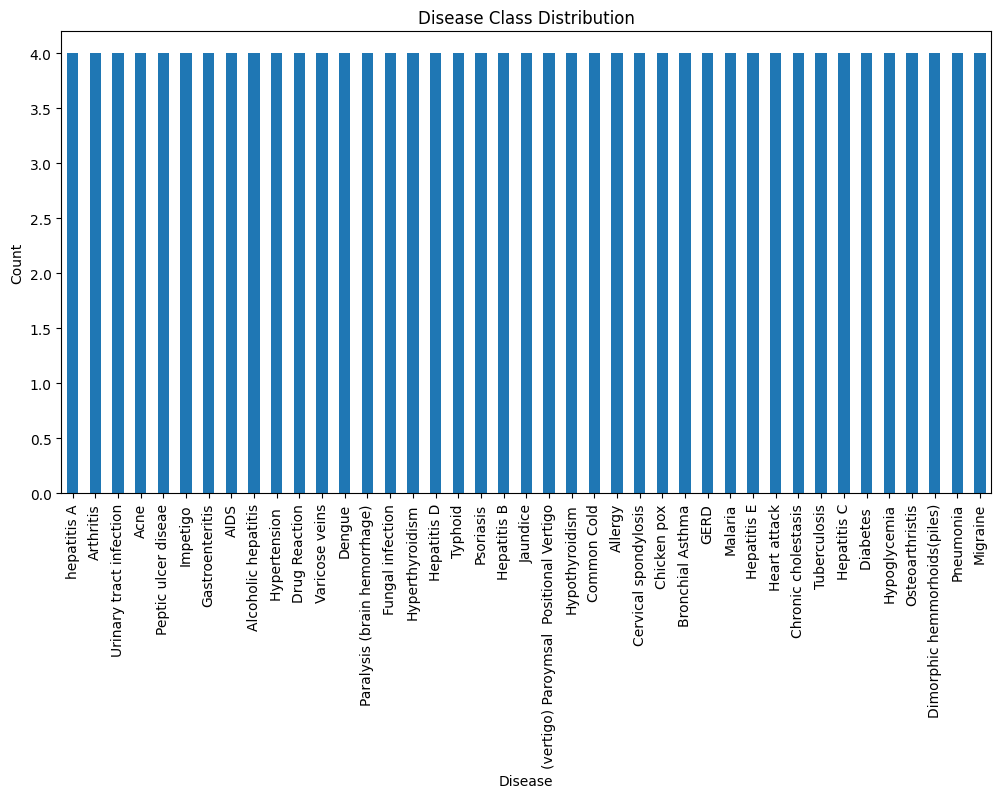

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
df_train["Disease"].value_counts().plot(kind="bar")
plt.title("Disease Class Distribution")
plt.xlabel("Disease")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()


## Feature Correlation Heatmap

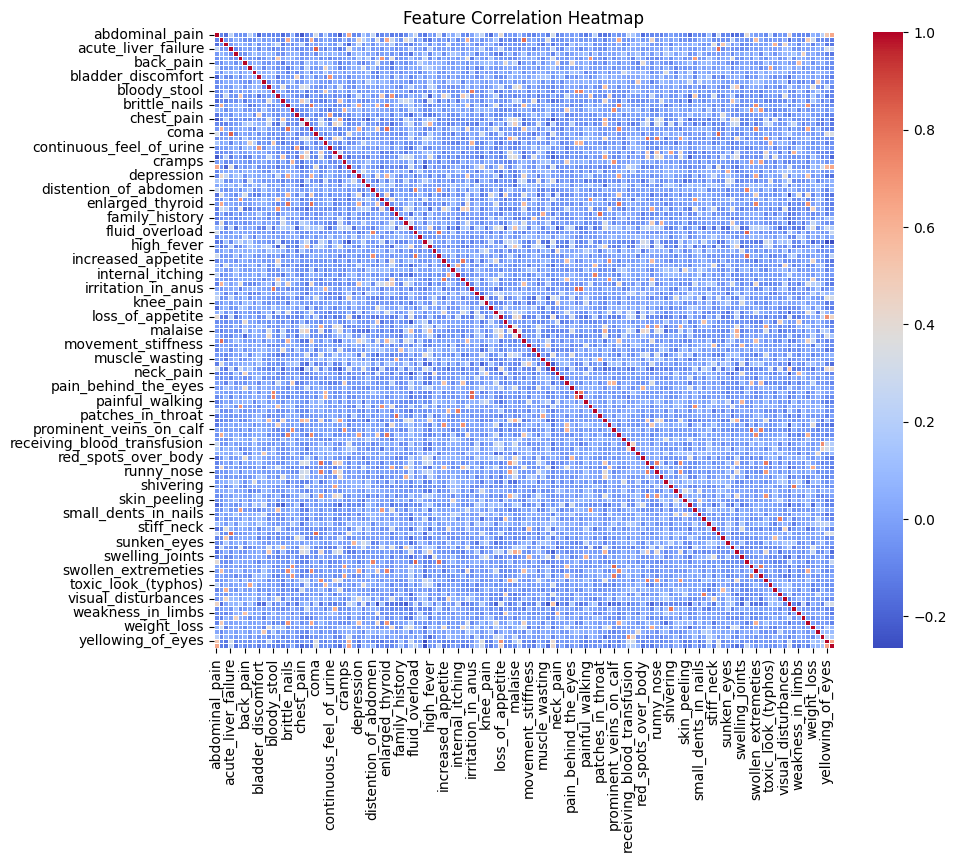

In [9]:
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(X_train.corr(), cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


## Most Common Symptoms

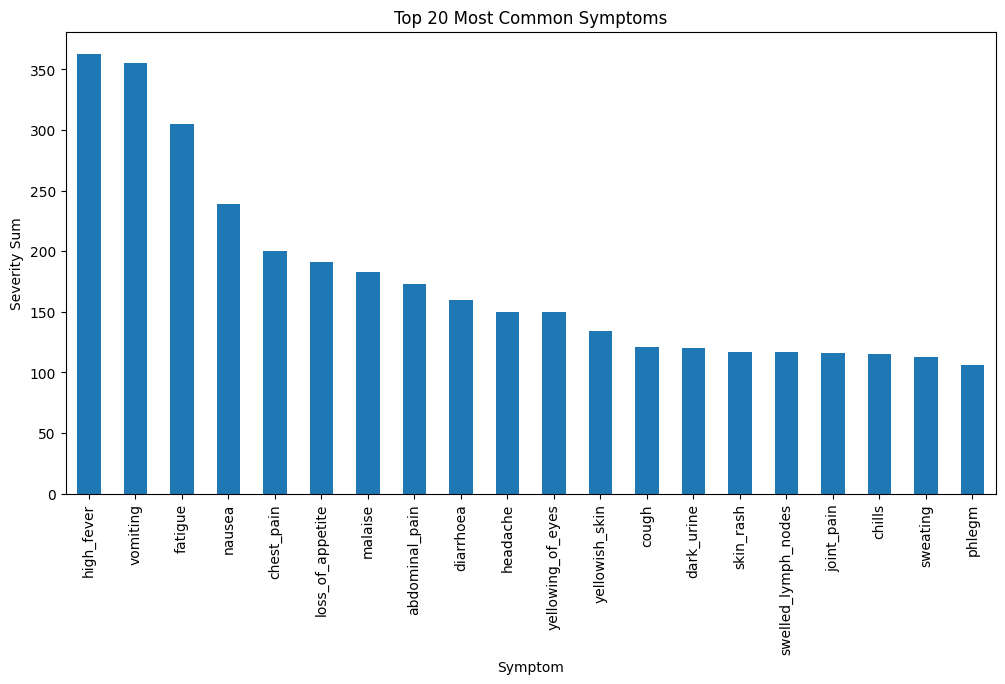

In [10]:
plt.figure(figsize=(12, 6))
X_train.sum(axis=0).sort_values(ascending=False)[:20].plot(kind="bar")
plt.title("Top 20 Most Common Symptoms")
plt.xlabel("Symptom")
plt.ylabel("Severity Sum")
plt.xticks(rotation=90)
plt.show()


In [11]:
import pandas as pd

# Load the augmented dataset
df_augmented = pd.read_csv("../data/processed/disease_symptom_encoded_augmented.csv")

# Count occurrences of each disease
disease_counts = df_augmented["Disease"].value_counts()
print(disease_counts)

# Check if any disease still has less than 5 samples
if (disease_counts < 5).any():
    print("⚠️ Some diseases still have less than 5 samples. Further augmentation is needed.")
else:
    print("✅ Data augmentation successfully ensured at least 5 samples per disease.")


Disease
(vertigo) Paroymsal  Positional Vertigo    5
AIDS                                       5
Acne                                       5
Alcoholic hepatitis                        5
Allergy                                    5
Arthritis                                  5
Bronchial Asthma                           5
Cervical spondylosis                       5
Chicken pox                                5
Chronic cholestasis                        5
Common Cold                                5
Dengue                                     5
Diabetes                                   5
Dimorphic hemmorhoids(piles)               5
Drug Reaction                              5
Fungal infection                           5
GERD                                       5
Gastroenteritis                            5
Heart attack                               5
Hepatitis B                                5
Hepatitis C                                5
Hepatitis D                                5
He